In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [4]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [6]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

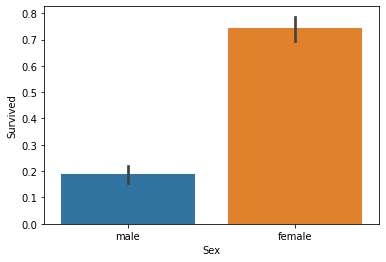

In [7]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

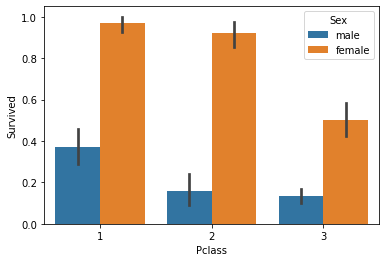

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

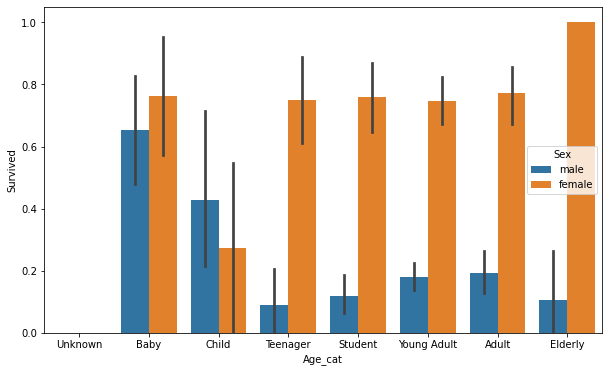

In [9]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [10]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [11]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [12]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
svm_svc = SVC() ##추가해보자.!!

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


# SVM 학습/예측/평가
svm_svc.fit(X_train , y_train)
svm_pred = lr_clf.predict(X_test)
print('SVM 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492
SVM 정확도: 0.8492


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.model_selection import KFold

In [16]:
kfold = KFold(n_splits=5)

In [17]:
for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    print(iter_count)

0
1
2
3
4


In [18]:
X_titanic_df.shape

(891, 8)

In [19]:
for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    print(iter_count)
    print('--------------')
    print(train_index)

0
--------------
[179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 4

In [20]:
for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    print(iter_count)
    print('--------------')
    print(test_index)

0
--------------
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178]
1
--------------
[179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237

In [21]:
X_titanic_df.values[train_index]

array([[ 3.        ,  1.        , 22.        , ...,  7.25      ,
         7.        ,  3.        ],
       [ 1.        ,  0.        , 38.        , ..., 71.2833    ,
         2.        ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  7.925     ,
         7.        ,  3.        ],
       ...,
       [ 1.        ,  0.        , 24.        , ..., 49.5042    ,
         2.        ,  0.        ],
       [ 1.        ,  1.        , 29.69911765, ..., 26.55      ,
         2.        ,  3.        ],
       [ 1.        ,  1.        , 48.        , ..., 52.        ,
         2.        ,  3.        ]])

In [22]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
    return mean_score
# exec_kfold 호출


In [23]:
all_result = []

In [24]:
len(all_result)

0

In [25]:
dt_result = exec_kfold(dt_clf , folds=5) 
dt_result
all_result.append(dt_result)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [26]:
svm_result10 = exec_kfold(svm_svc , folds=10) 
svm_result10
all_result.append(svm_result10)

교차 검증 0 정확도: 0.6000
교차 검증 1 정확도: 0.6742
교차 검증 2 정확도: 0.6629
교차 검증 3 정확도: 0.6742
교차 검증 4 정확도: 0.6517
교차 검증 5 정확도: 0.7079
교차 검증 6 정확도: 0.6742
교차 검증 7 정확도: 0.7303
교차 검증 8 정확도: 0.7303
교차 검증 9 정확도: 0.6854
평균 정확도: 0.6791


In [27]:
rf_result = exec_kfold(rf_clf , folds=10) 
rf_result
all_result.append(rf_result)

교차 검증 0 정확도: 0.7778
교차 검증 1 정확도: 0.7865
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.8202
교차 검증 4 정확도: 0.8315
교차 검증 5 정확도: 0.8202
교차 검증 6 정확도: 0.7865
교차 검증 7 정확도: 0.7865
교차 검증 8 정확도: 0.8764
교차 검증 9 정확도: 0.8539
평균 정확도: 0.8115


In [28]:
len(all_result)

3

In [29]:
def all_max(all_list):
    print(all_list)
    max_value = 0
    for model_result in all_list:
        if(model_result > max_value):
            max_value = model_result
        print('현재까지의 max값 >> ' , max_value)
    return max_value

In [30]:
type(all_result[0])

numpy.float64

In [31]:
max_result = all_max(all_result)
print(max_result)

[0.782298662984119, 0.6791011235955057, 0.8114856429463171]
현재까지의 max값 >>  0.782298662984119
현재까지의 max값 >>  0.782298662984119
현재까지의 max값 >>  0.8114856429463171
0.8114856429463171


In [32]:
def all_max2(all_list):
    max_value = 0
    index = 0
    for i, model_result in enumerate(all_list):
        if(model_result > max_value):
            max_value = model_result
            index = i
        print('현재까지의 max값 >> ' , max_value)
    return max_value, index

In [33]:
max_result2 = all_max2(all_result)
print(max_result2)

현재까지의 max값 >>  0.782298662984119
현재까지의 max값 >>  0.782298662984119
현재까지의 max값 >>  0.8114856429463171
(0.8114856429463171, 2)


In [34]:
model_list = ['decision tree', 'svm10', 'random forest']

In [35]:
# print('최적의 model은 ', model_list[2])
print('최적의 model은 ', model_list[max_result2[1]])

최적의 model은  random forest


# k-fold를 한번으로 묶어보세요.
- final_result = callKFold_all()
- print("-----")
- =================
- 최적의 model은  random forest, 최대 accuracy는 0.8111

# final_result2 = callKFold_all2()

- cross_val_score()함수 호출!!
- 반복문 이용!!하여 모든 모델에 대해 수행
- =================
- 최적의 model은  random forest, 최대 accuracy는 0.8111

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv =5)
scores

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [38]:
type(scores)

numpy.ndarray

In [39]:
for index, accuracy in enumerate(scores):
    print("cross validadtion : {0} => 정확도 : {1:.4f}".format(index+1, accuracy))

cross validadtion : 1 => 정확도 : 0.7430
cross validadtion : 2 => 정확도 : 0.7753
cross validadtion : 3 => 정확도 : 0.7921
cross validadtion : 4 => 정확도 : 0.7865
cross validadtion : 5 => 정확도 : 0.8427


In [40]:
print("average accuracy : {0:.4f}".format(np.mean(scores)))

average accuracy : 0.7879


## 수업전(타이타닉-k-fold 교차검증+함수모듈화 까지) 소스:

In [41]:
# kfold 교차검증을 통해 최적이 모델을 찾아보자 (라이브러리를 써보자)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv =5)
for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도: 0.7430
교차검증 1 정확도: 0.7753
교차검증 2 정확도: 0.7921
교차검증 3 정확도: 0.7865
교차검증 4 정확도: 0.8427
평균 정확도 : 0.7879


In [42]:
# GridSearchCV를 통해서 최적을 파라메터를 찾아서 참고해보자

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

# dt_clf : decisionTree 객체
# dt_clf : DecisionTreeClassifier(random_state=11)
# rt_clf : RandomForestClassifier(random_state=11)
# lr_clf : LogisticReqression()

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

# scores_df = pd.DataFrame(grid_dclf.cv_results_)
# print(scores_df)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


In [44]:
best_score = grid_dclf.best_score_
best_score

0.7991825076332119

In [45]:
pred = best_dclf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [46]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8715083798882681

In [47]:
scores_df = pd.DataFrame(grid_dclf.cv_results_)
print(scores_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.006198      0.000747         0.003800        0.001167   
1        0.005995      0.000634         0.003602        0.001200   
2        0.006000      0.001093         0.004400        0.001499   
3        0.006398      0.001496         0.003803        0.000984   
4        0.005797      0.000751         0.003209        0.000742   
5        0.004196      0.000400         0.002399        0.000491   
6        0.004201      0.000398         0.002600        0.000491   
7        0.004599      0.001199         0.002607        0.000826   
8        0.004405      0.000495         0.002402        0.000489   
9        0.004199      0.000401         0.002599        0.000489   
10       0.006400      0.001853         0.003802        0.001323   
11       0.005401      0.001014         0.002799        0.000399   
12       0.004209      0.000395         0.002983        0.001087   
13       0.004209      0.000393         0.002801

In [48]:
# SVM의 그리드 서치를 실시해보자

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [50]:
print(accuracy_score(y_test, pred))

0.8715083798882681


In [51]:
print(precision_score(y_test, pred))

0.8392857142857143


In [52]:
print(recall_score(y_test, pred))

0.7704918032786885


In [53]:
print(f1_score(y_test, pred))

0.8034188034188035


In [54]:
print(roc_auc_score(y_test, pred))

0.8471103084190053
